#Membaca Data


Pada tahap ini  akan menghubungkan google colab dengan kaggle sehingga pengambilan dataset dapat lebih cepat dan mudah, hal yang perlu dilakukan adalah sebagai berikut

1. Hubungkan google drive pada google colab
2. Dapatkan Token API dari Kaggle Profile
3. Upload Kaggle API json ke folder pada Google drive
4. Download dataset dari Kaggle API yang diinginkan
5. ekstrak file tersebut
6. read file tersebut menggunakan code dan pastikan path penyimpanan telah sesuai

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Tahap ini adalah tahap menghubungkan google drive ke google colab

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Tahap ini adalah tahap menghubungakan direktori file API json yang telah di upload ke direktori pada google colab

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


Tahap ini adalah tahap mengarahkan file yang di download nanti pada direktrori /content/gdrive/My Drive/Kaggle

In [4]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Tahap ini mendownload file yang ada pada kaggle menggunakan API

In [5]:
!unzip \*.zip  && rm *.zip

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Tahap ini adalah mengekstrak file yang ada pada google drive

In [6]:
import pandas as pd
import numpy as np


movies_metadata = pd.read_csv('/content/gdrive/MyDrive/Kaggle/movies_metadata.csv')
movies_metadata.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Tahap ini adalah tahap mengimport libary untuk membaca file dan menampilkan 5 data awal

In [7]:
remove_n = 40000
np.random.seed(0)
drop_indices = np.random.choice(movies_metadata.index, remove_n, replace=False)
movies_metadata = movies_metadata.drop(drop_indices)

Tahap ini data dikurangi karena spesifikasi laptop yang digunakan tidak kompatibel untuk data yang terlalu banyak


In [8]:
len(movies_metadata)

5466

Jumlah data yang digunakan untuk diproeses adalah 5466 baris

#Membersihkan dan Mempersiapkan Data

In [9]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 10 to 45461
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5466 non-null   object 
 1   belongs_to_collection  533 non-null    object 
 2   budget                 5466 non-null   object 
 3   genres                 5466 non-null   object 
 4   homepage               935 non-null    object 
 5   id                     5466 non-null   object 
 6   imdb_id                5465 non-null   object 
 7   original_language      5463 non-null   object 
 8   original_title         5466 non-null   object 
 9   overview               5346 non-null   object 
 10  popularity             5466 non-null   object 
 11  poster_path            5409 non-null   object 
 12  production_companies   5466 non-null   object 
 13  production_countries   5466 non-null   object 
 14  release_date           5457 non-null   object 
 15  re

Pada tahap ini kita dapat melihat informasi tentang DataFrame pada data yang telah dibaca berupa indeks dtype, kolom, nilai non-null, dan penggunaan memori.

Data yang digunakan kali ini tidak memiliki nilai null

In [10]:
movies_metadata.genres.unique()

array(["[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
       "[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}]",
       "[{'id': 36, 'name': 'History'}, {'id': 18, 'name': 'Drama'}]",
       ...,
       "[{'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}, {'id': 9648, 'name': 'Mystery'}]",
       "[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}]"],
      dtype=object)

Pada tahap ini melihat unique value dari kolom genre

In [11]:
len(movies_metadata.genres.unique())


1091

Pada tahap ini melihat panjang dari unique value dari kolom genre

In [12]:
judul = movies_metadata['original_title'].tolist()
genre = movies_metadata['genres'].tolist()

print(len(judul))
print(len(genre))

5466
5466


pada tahap ini dipilih beberapa kolom berdasarkan data yang dibutuhkan untuk melakukan content based learning berdasarkan genre yaitu judul dan genre 

In [13]:
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data.head()

,judul,genre
0,The American President,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
1,Dracula: Dead and Loving It,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam..."
2,Nixon,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na..."
3,Money Train,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
4,Now and Then,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


pada tahap ini membuat data yang dipilih menjadi dalam bentuk dataframe sehingga mudah untuk dipersiapkan

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5466 entries, 0 to 5465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   5466 non-null   object
 1   genre   5466 non-null   object
dtypes: object(2)
memory usage: 85.5+ KB


Pada tahap ini kita dapat melihat informasi tentang DataFrame pada data yang telah dibaca berupa indeks dtype, kolom, nilai non-null, dan penggunaan memori.

Data yang digunakan kali ini tidak memiliki nilai null sehingga tidak ada data yang kosong yang perlu di isi atau dihapus

In [15]:
value_genre = pd.DataFrame(data['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(value_genre))
pd.options.display.max_colwidth = 500
value_genre.head()

1091


,genre,count
0,"[{'id': 18, 'name': 'Drama'}]",583
1,"[{'id': 35, 'name': 'Comedy'}]",457
2,"[{'id': 99, 'name': 'Documentary'}]",337
3,[],295
4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",137


Pada tahap ini melihat banyaknya data dari setiap unique value berdasarkan genre

In [16]:
data = data[data.genre != '[]']

Pada tahap ini dilakukan penghapusan data baris genre yang berisi nilai "[]"

In [17]:
data.genre.unique()

array(["[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
       "[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}]",
       "[{'id': 36, 'name': 'History'}, {'id': 18, 'name': 'Drama'}]",
       ...,
       "[{'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}, {'id': 9648, 'name': 'Mystery'}]",
       "[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}]"],
      dtype=object)

Pada tahap ini kembali melihat unique value dari data dengan kolom genre

In [18]:
len(data.genre.unique())

1090

Pada tahap ini diperlihatkan panjang baris dari data genre yang telah dikurangi data genre yang bervalue "[]"

In [19]:
len(data)

5171

Pada tahap ini diperlihatkan banyak baris dari data yang digunakan

In [20]:
data = data.drop_duplicates('judul')
len(data)

5134

Pada tahap ini dihapus baris data yang sama berdasarkan kolom judul dan melihat kembali panjang datanya

In [21]:
data.shape

(5134, 2)

Pada tahap ini diperlihatkan ukuran dari matriks data yang digunakan

In [22]:
data.reset_index()
data.head()

,judul,genre
0,The American President,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"
1,Dracula: Dead and Loving It,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}]"
2,Nixon,"[{'id': 36, 'name': 'History'}, {'id': 18, 'name': 'Drama'}]"
3,Money Train,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}]"
4,Now and Then,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]"


Pada tahap ini dilakukan indeks ulang pada data yang digunakan agar penomoran berurutan

In [23]:
def str_to_list(x):
    genre_list = []
    for item in eval(x):
        genre_list.append(item['name'])
    return genre_list

data.genre = data.genre.apply(str_to_list)

Pada tahap ini diambil value name dari genre dari data genre yang berisi id dan name, sehingga data genre dapat terlihat lebih jelas 

In [24]:
judul = data['judul'].tolist()
genre = data['genre'].tolist()

print(len(judul))
print(len(genre))

5134
5134


Pada tahap ini dilakukan konversi data series menjadi list

In [25]:
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data.head()

,judul,genre
0,The American President,"[Comedy, Drama, Romance]"
1,Dracula: Dead and Loving It,"[Comedy, Horror]"
2,Nixon,"[History, Drama]"
3,Money Train,"[Action, Comedy, Crime]"
4,Now and Then,"[Comedy, Drama, Family]"


Pada tahap ini dibuat dictionary untuk menentukan pasangan key-value pada data 
judul dan genre

In [26]:
genre = [str (item) for item in data['genre']]

genre = [item for item in genre if not isinstance(item, int)]

Pada tahap ini membuat data didalam genre menjadi string karena sebelumnya data didalam genre berupa series dan masih terdapat data bertipe integer sehingga tidak bisa diproses pada tahap selanjutnya

#Feature Enggenering

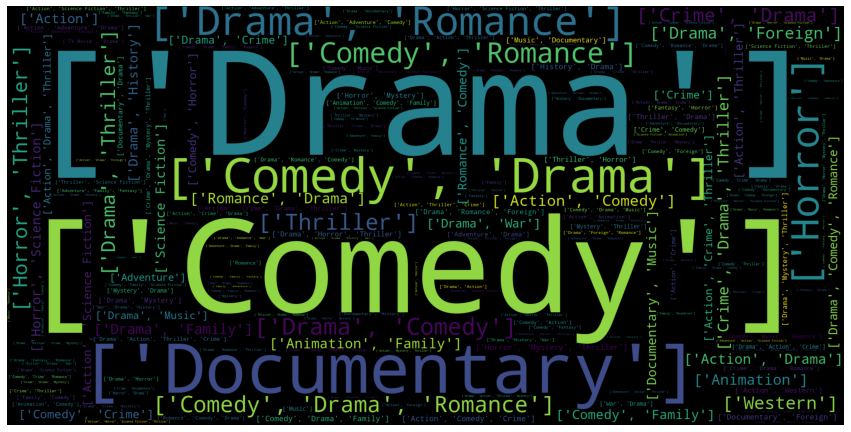

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

word_could_dict=Counter(genre)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Pada tahap ini diperlihatkan genre pada seluruh data dengan ukuran berdasarkan genre yang paling banyak muncul menggunakan plot word cloud

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 
 
# Inisialisasi CountVectorizer
tf = CountVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(genre) 

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'fiction',
 'foreign',
 'history',
 'horror',
 'movie',
 'music',
 'mystery',
 'romance',
 'science',
 'thriller',
 'tv',
 'war',
 'western']

Pada tahap ini membangun sistem rekomendasi sederhana berdasarkan genre yang ada pada setiap movies.

In [29]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(genre) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(5134, 22)

Pada tahap ini di lakukan proses fit dan transformasi ke dalam bentuk matriks

In [30]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Pada tahap ini bertujuan Untuk menghasilkan vektor tf-idf dalam bentuk matriks menggunakan fungsi todense().

In [31]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.judul
).sample(22, axis=1).sample(10, axis=0)

,documentary,action,family,comedy,romance,mystery,foreign,music,western,animation,crime,science,thriller,war,tv,adventure,fiction,movie,horror,history,drama,fantasy
judul,,,,,,,,,,,,,,,,,,,,,,
The Box,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
Contracorriente,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
La Voie Lactée,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Bob le Flambeur,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
The Fox and the Hound,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
Taking Chances,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
번지 점프를 하다,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
The Rise and Fall of a Jungle Giant,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Soul of a Man,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pada tahapini kita melihat matriks tf-idf untuk beberapa judul film dan kategori genre

#Latih Model dengan cosine similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.40824829, 0.40824829, ..., 0.40824829, 0.40824829,
        0.40824829],
       [0.40824829, 1.        , 0.        , ..., 1.        , 0.5       ,
        0.        ],
       [0.40824829, 0.        , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.40824829, 1.        , 0.        , ..., 1.        , 0.5       ,
        0.        ],
       [0.40824829, 0.5       , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

Pada tahap ini dihitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=genre)
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5134, 5134)


,"['Comedy', 'Horror']",['Action'],['Thriller'],"['Comedy', 'Drama']","['Drama', 'Action', 'Thriller', 'Crime', 'Foreign']"
judul,,,,,
High Hopes,0.500000,0.0,0.0,1.000000,0.316228
Les Patterson Saves the World,0.707107,0.0,0.0,0.707107,0.000000
Rambo: First Blood Part II,0.000000,0.5,0.5,0.000000,0.447214
Maudie,0.000000,0.0,0.0,0.408248,0.258199
Gasland,0.000000,0.0,0.0,0.000000,0.000000
Excuse Me for Living,0.500000,0.0,0.0,0.500000,0.000000
Big Time,0.000000,0.0,0.0,0.353553,0.223607
The Emperor's Club,0.000000,0.0,0.0,0.500000,0.316228
"Bright Lights, Big City",0.000000,0.0,0.0,0.707107,0.447214


Pada tahap ini diperlihatkan matriks kesamaan setiap judul dengan menampilkan judul film dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

#Uji Model

In [34]:
indices = pd.Series(index = data['judul'], data = data.index).drop_duplicates()
indices.head()

judul
The American President         0
Dracula: Dead and Loving It    1
Nixon                          2
Money Train                    3
Now and Then                   4
dtype: int64

Pada tahap dilakukan indikasi dan diperlihatkan judul film berdasarkan urutan dari data

In [35]:
def get_recommendations(judul, cosine_sim = cosine_sim,items=data[['judul','genre']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnnya
    idx = indices[judul]
    
    # Mengambil skor kemiripan dengan semua judul film 
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    
    # Mengambil 10 skor kemiripan dari 1-10 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    sim_scores = sim_scores[1:11]
    
    # Mengambil judul film dari skor kemiripan
    movie_indices = [i[0] for i in sim_scores]
    
    # Mengembalikan 10 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 10 rekomendasi film tersebut
    return pd.DataFrame(data['judul'][movie_indices]).merge(items)

Pada tahap ini dibuat fungsi untuk memanggil 10 rekomendasi film berdasarkan judul yang di input

In [36]:
data[data.judul.eq('The American President')]

,judul,genre
0,The American President,"[Comedy, Drama, Romance]"


Pada tahap ini dilakukan cek apakah judul film ada pada data atau tidak

In [37]:
rekomendasi = pd.DataFrame(get_recommendations('The American President'))
rekomendasi

,judul,genre
0,Nueba Yol,"[Comedy, Drama, Romance]"
1,飲食男女,"[Comedy, Drama, Romance]"
2,Only You,"[Comedy, Drama, Romance]"
3,Muriel's Wedding,"[Drama, Comedy, Romance]"
4,The Favor,"[Drama, Comedy, Romance]"
5,The Inkwell,"[Comedy, Drama, Romance]"
6,Meet John Doe,"[Drama, Comedy, Romance]"
7,The Pompatus of Love,"[Comedy, Romance, Drama]"
8,Jerry Maguire,"[Comedy, Drama, Romance]"
9,Roseanna's Grave,"[Comedy, Romance, Drama]"


Pada tahap ini ditampilkan 10 rekomendasi film dari judul yang telah di input

In [38]:
value = pd.DataFrame(rekomendasi['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
value.head()

,genre,count
0,"[Comedy, Drama, Romance]",5
1,"[Drama, Comedy, Romance]",3
2,"[Comedy, Romance, Drama]",2


Pada tahap ini melihat jumlah genre dari rekomendasi

In [39]:
TP = 10 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))


100%


Pada tahap ini digunakan metrik precision untuk melihat akurasi